Google Colab Link: https://drive.google.com/file/d/1dxNIbefkpGpFE9EOGYI7gy2UIVrsigXf/view?usp=sharing

# <font color='orange'>  <center> Lab Exercise 8 : Vectorize Twitter Data

In this lab exercise, we will create embeddings with PPMI for twitter 
data. 
1. Complete the python-notebook by adding the code PPMI 
computation. 
2. Extract tweets (min 10000) from twitter for a particular domain for 
your interest (#coronavirus, #cricket, #mahabharata..) 
3. Create word-embeddings using SVD reduction method on PPMI 
matrix.

### <font color='orange'>  <center> Part 1

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

#Co-occurence Matrix

In [2]:
def co_occurence(corpus, vocab, window_size):
    num_words = len(vocab)
    M = np.zeros((num_words, num_words),dtype=np.uint8)
    for line in corpus:
        for i in range(len(line)):
            target = line[i]
            target_index = vocab[target]
            left = max(i - window_size, 0)
            right = min(i + window_size, len(line) - 1)
        for j in range(left, i):
            window_word = line[j]
            M[target_index][vocab[window_word]] += 1
            M[vocab[window_word]][target_index] += 1
    return M
#https://www.cnblogs.com/shiyublog/p/11136940.html

# you may code the matrix creation or may use the above function

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
corpus = [ 'She eats banana',
         'She eats cookies',
         'She likes banana', 
         'She likes cookies',
         'He eats cookies', 
         'He eats banana',
         'He likes cookies', 
         'He likes banana',
         'She likes NLP',
         'He likes NLP',
         ]

In [5]:
import nltk
from nltk.tokenize import sent_tokenize

In [6]:
BoWvectorizer = CountVectorizer(analyzer="word", token_pattern='[a-zA-Z]+')
#BoWvectorizer = CountVectorizer(stop_words= 'english') 
# fit() function will learn a vocabulary from one or more documents.
BoWvectorizer.fit(corpus)
# transform() function will transform one or more documents to vectors
vector = BoWvectorizer.transform(corpus)

#BoWvectorizer.vocabulary_

In [7]:
words = BoWvectorizer.get_feature_names_out ()
len(words)

7

In [8]:
#corpus should be sent as list of list of tokens
c1 = []
i=0
for doc in corpus:
    t=[]
    for w in doc.split():
        if w.lower() in words:
              t.append(w.lower())
    c1.append(t)

In [9]:
coMat = co_occurence(c1, BoWvectorizer.vocabulary_,4)
coMat

array([[0, 0, 2, 2, 2, 0, 2],
       [0, 0, 2, 2, 2, 0, 2],
       [2, 2, 0, 0, 0, 0, 0],
       [2, 2, 0, 0, 0, 1, 0],
       [2, 2, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 2, 0, 1],
       [2, 2, 0, 0, 0, 1, 0]], dtype=uint8)

In [10]:
coMat[0][5]

0

In [11]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
cols = list(BoWvectorizer.vocabulary_.keys())
dff = pd.DataFrame(coMat, columns = cols)
dff

,she,eats,banana,cookies,likes,he,nlp
0,0,0,2,2,2,0,2
1,0,0,2,2,2,0,2
2,2,2,0,0,0,0,0
3,2,2,0,0,0,1,0
4,2,2,0,0,0,2,0
5,0,0,0,1,2,0,1
6,2,2,0,0,0,1,0


In [12]:
def cal_pmi(coMat, x, y):
    col_totals = coMat.sum(axis=0)
    T = col_totals.sum()
    f_x = coMat[x].sum()
    f_y = coMat[y].sum()
    f_xy = coMat[x][y]
    with np.errstate(divide='ignore'):
        d = f_x * f_y
        if(d != 0):
            p = (f_xy * T) / (f_x * f_y)
        else:
            p = (f_xy * T) / ((f_x * f_y) + 0.00001)
        pmi_x_y = np.log2(p)
        if(np.isinf(pmi_x_y)):
            pmi_x_y = 0.0
    return pmi_x_y

In [13]:
r,c = coMat.shape
PPMI = []
for i in range(r):
    l = []
    for j in range(c):
        l.append(cal_pmi(coMat, i, j))
    PPMI.append(l)

In [14]:
print(PPMI)

[[0.0, 0.0, 1.3219280948873624, 1.0, 0.7369655941662062, 0.0, 1.0], [0.0, 0.0, 1.3219280948873624, 1.0, 0.7369655941662062, 0.0, 1.0], [1.3219280948873624, 1.3219280948873624, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.7369655941662062, 0.7369655941662062, 0.0, 0.0, 0.0, 1.7369655941662063, 0.0], [0.0, 0.0, 0.0, 1.0, 1.7369655941662063, 0.0, 1.0], [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]


#Save results

In [15]:
df2= pd.DataFrame(data=PPMI, columns = words)
df2.insert(0, "words", words, True)
df2.to_csv('n2.csv')

In [16]:
df2

,words,banana,cookies,eats,he,likes,nlp,she
0,banana,0.00000,0.00000,1.32193,1.00000,0.73697,0.00000,1.00000
1,cookies,0.00000,0.00000,1.32193,1.00000,0.73697,0.00000,1.00000
2,eats,1.32193,1.32193,0.00000,0.00000,0.00000,0.00000,0.00000
3,he,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,likes,0.73697,0.73697,0.00000,0.00000,0.00000,1.73697,0.00000
5,nlp,0.00000,0.00000,0.00000,1.00000,1.73697,0.00000,1.00000
6,she,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000


from sklearn.decomposition import TruncatedSVD#Dimensionality Reduction using SVD


In [17]:
from sklearn.decomposition import TruncatedSVD

In [18]:
svd = TruncatedSVD(2)

In [19]:
transformed = svd.fit_transform(PPMI)

In [20]:
for i in range(len(transformed)):
    print(words[i], transformed[i])

banana [0.         1.99930089]
cookies [0.         1.99930089]
eats [1.540838 0.      ]
he [ 1.73189352 -0.        ]
likes [ 1.84264051 -0.        ]
nlp [-0.          1.94268063]
she [ 1.73189352 -0.        ]


In [21]:
df3= pd.DataFrame(data=transformed)
df3.insert(0, "words", words, True)
df3

,words,0,1
0,banana,0.00000,1.99930
1,cookies,0.00000,1.99930
2,eats,1.54084,0.00000
3,he,1.73189,-0.00000
4,likes,1.84264,-0.00000
5,nlp,-0.00000,1.94268
6,she,1.73189,-0.00000


In [22]:
df3.to_csv('embeddings.csv')

Natural Language Processing - Lab Manual
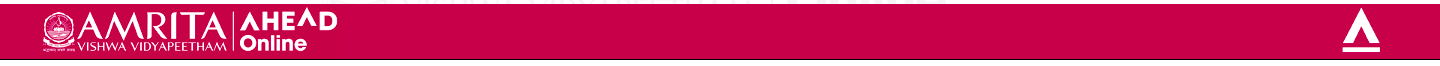

#s

In [23]:
R2 = np.dot(transformed, transformed.T)

In [24]:
R2

array([[ 3.99720406,  3.99720406,  0.        ,  0.        , -0.        ,
         3.88400312,  0.        ],
       [ 3.99720406,  3.99720406,  0.        ,  0.        , -0.        ,
         3.88400312,  0.        ],
       [ 0.        ,  0.        ,  2.37418173,  2.66856735,  2.83921052,
         0.        ,  2.66856735],
       [ 0.        ,  0.        ,  2.66856735,  2.99945518,  3.19125717,
        -0.        ,  2.99945518],
       [-0.        , -0.        ,  2.83921052,  3.19125717,  3.39532407,
        -0.        ,  3.19125717],
       [ 3.88400312,  3.88400312,  0.        , -0.        , -0.        ,
         3.77400803, -0.        ],
       [ 0.        ,  0.        ,  2.66856735,  2.99945518,  3.19125717,
        -0.        ,  2.99945518]])

In [25]:
df4 = pd.DataFrame(data=R2, columns =words )
df4.insert(0, "words", words, True)

In [26]:
df4

,words,banana,cookies,eats,he,likes,nlp,she
0,banana,3.99720,3.99720,0.00000,0.00000,-0.00000,3.88400,0.00000
1,cookies,3.99720,3.99720,0.00000,0.00000,-0.00000,3.88400,0.00000
2,eats,0.00000,0.00000,2.37418,2.66857,2.83921,0.00000,2.66857
3,he,0.00000,0.00000,2.66857,2.99946,3.19126,-0.00000,2.99946
4,likes,-0.00000,-0.00000,2.83921,3.19126,3.39532,-0.00000,3.19126
5,nlp,3.88400,3.88400,0.00000,-0.00000,-0.00000,3.77401,-0.00000
6,she,0.00000,0.00000,2.66857,2.99946,3.19126,-0.00000,2.99946


In [27]:
from sklearn.metrics.pairwise import paired_cosine_distances,cosine_similarity

In [28]:
paired_cosine_distances(R2,R2.T)

array([0., 0., 0., 0., 0., 0., 0.])

In [29]:
Sim = cosine_similarity(R2,R2.T)

In [30]:
df5 = pd.DataFrame(data=Sim, columns = words )
df5.insert(0, "words", words, True)

In [31]:
df5

,words,banana,cookies,eats,he,likes,nlp,she
0,banana,1.00000,1.00000,0.00000,0.00000,-0.00000,1.00000,0.00000
1,cookies,1.00000,1.00000,0.00000,0.00000,-0.00000,1.00000,0.00000
2,eats,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000
3,he,0.00000,0.00000,1.00000,1.00000,1.00000,-0.00000,1.00000
4,likes,-0.00000,-0.00000,1.00000,1.00000,1.00000,-0.00000,1.00000
5,nlp,1.00000,1.00000,0.00000,-0.00000,-0.00000,1.00000,-0.00000
6,she,0.00000,0.00000,1.00000,1.00000,1.00000,-0.00000,1.00000


### <font color='orange'>  <center> Part 2

In [32]:
import twitter_info
import tweepy
import pandas as pd

In [33]:
consumer_key = twitter_info.API_Key
consumer_secret = twitter_info.API_Key_Secret
access_token = twitter_info.Access_Token
access_token_secret = twitter_info.Access_Token_Secret
bearer_token = twitter_info.Bearer_Token

client = tweepy.Client(bearer_token = bearer_token)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
API = tweepy.API(auth, wait_on_rate_limit=True, retry_count=5, retry_delay=180)

In [36]:
%%time
fresh_load = False
if(fresh_load):
    query_list = ["global warming"]
    tweets_response_list = []
    for q in query_list:
        for page in tweepy.Cursor(API.search_tweets, q=q + " lang:en -filter:retweets", count=100, tweet_mode='extended').pages(150):
            for response in page:
                tweets_response_list.append([response.id_str, response.full_text, q])
        df = pd.DataFrame(tweets_response_list, columns = ['id_str', 'full_text', 'label'])
    df.to_csv("twitter_data_global_warming", index = False)
else:
    df = pd.read_csv("twitter_data_global_warming")

Wall time: 72.8 ms


In [37]:
df

,Unnamed: 0,id_str,full_text,label
0,0,1514617421113737218,-Donate and Support non-governmental organizat...,global warming
1,1,1514617294869065738,badly wanna use this acc to help spread awaren...,global warming
2,2,1514617222802538508,What in the global warming is this weather??,global warming
3,3,1514617157526880260,Daily task(2) prevent burning of garbage &amp;...,global warming
4,4,1514617068871577609,"SAVE OUR PLANET, STOP GLOBAL WARMING",global warming
...,...,...,...,...
14765,14765,1512492674728677378,@PaleoFoodee @maeloitering @ProudSocialist Boo...,global warming
14766,14766,1512492633943207943,@SatishBhatia814 @ajay43 High price of Petrol ...,global warming
14767,14767,1512492623570751489,@pulpmx Ever wonder if the solution to global ...,global warming
14768,14768,1512492580256288779,Increase in atmospheric methane set another re...,global warming


### <font color='orange'>  <center> Part 3

In [50]:
from nltk.stem.porter import PorterStemmer
pm = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [51]:
corpus2 = df['full_text'][:100]

In [52]:
def clean_tokens(token_list): ## to remove tokens like zzzzz, aa, kkk, one/two letter toekns, aaaanndd, aab
    new_tkn_lst = []
    for tkn in token_list:
        if((len(tkn) >= 3 or tkn == "dc") and len(set(list(tkn))) > 1 and len(re.findall(r'((\w)\2{2,})', tkn)) == 0  and len(re.findall(r'(^(\w)\2{1,})', tkn)) == 0):
            new_tkn_lst.append(tkn)
    return new_tkn_lst

In [53]:
def preprocess_doc(txt):
    txt = txt.lower()
    txt = re.sub(r'http\S+', '', txt) #remove URLs
    txt = re.sub('[^a-zA-Z-]', ' ', txt ) #removing punctuations numbers
    wrd_tkn = word_tokenize(txt)
    wrd_tkn = clean_tokens(wrd_tkn)
    final_wrd_tkn = wrd_tkn
    final_wrd_tkn = [word for word in final_wrd_tkn if not word in set(stopwords.words('english')) ]
    final_wrd_tkn = [pm.stem(word) for word in final_wrd_tkn]
    return " ".join(final_wrd_tkn)

In [54]:
%%time
corpus2 = [preprocess_doc(twt) for twt in corpus2]

Wall time: 604 ms


In [55]:
BoWvectorizer2 = CountVectorizer(analyzer="word", token_pattern='[a-zA-Z]+')
BoWvectorizer2.fit(corpus2)
vector2 = BoWvectorizer2.transform(corpus2)
words2 = BoWvectorizer2.get_feature_names_out()
len(words2)

736

In [56]:
%%time
c2 = []
i=0
for doc in corpus2:
    t=[]
    for w in doc.split():
        if w.lower() in words2:
              t.append(w.lower())
    c2.append(t)
c2 = [v for v in c2 if len(v)>0]

Wall time: 31.9 ms


In [57]:
coMat2 = co_occurence(c2, BoWvectorizer2.vocabulary_, window_size = 4)
coMat2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
cols = list(BoWvectorizer2.vocabulary_.keys())
df_coMat = pd.DataFrame(coMat2, columns = cols)
df_coMat

,donat,support,non,government,organ,activ,help,fight,global,warm,...,mother,heal,goe,mobilelegendsol,appreci,trash,gmail,philippin,unhappi,buy
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
%%time
from tqdm import tqdm
r,c = coMat2.shape
PPMI2 = []
for i in tqdm(range(r)):
    l = []
    for j in range(c):
        l.append(cal_pmi(coMat2, i, j))
    PPMI2.append(l)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 736/736 [06:14<00:00,  1.97it/s]

Wall time: 6min 14s


In [60]:
df5= pd.DataFrame(data=PPMI2, columns = words2)
df5.insert(0, "words", words2, True)
df5.to_csv('n3.csv')

In [61]:
svd2 = TruncatedSVD(10)
transformed2 = svd2.fit_transform(PPMI2)

In [62]:
df6= pd.DataFrame(data=transformed2)
df6.insert(0, "words", words2, True)
df6

,words,0,1,2,3,4,5,6,7,8,9
0,aberr,1.21681,1.40876,-0.34922,0.41692,-0.49421,-0.42154,0.16317,0.09764,0.03507,0.09401
1,absolut,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,abt,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,acc,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,ach,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
731,wrong,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
732,yeah,0.22128,0.00797,0.96667,1.30217,-2.19979,0.23946,-1.34034,-1.28984,0.78599,0.08016
733,year,3.27680,-3.20122,-1.45310,0.49236,-0.16960,-0.60118,-0.66082,0.17086,-0.06139,0.14743
734,yesterday,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [63]:
df6.to_csv('embeddings_twitter.csv')

In [64]:
R2 = np.dot(transformed2, transformed2.T)
R2

array([[ 4.22916479,  0.        ,  0.        , ...,  0.44804161,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.44804161,  0.        ,  0.        , ..., 24.22072328,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
df7 = pd.DataFrame(data=R2, columns =words2 )
df7.insert(0, "words", words2, True)
df7

,words,aberr,absolut,abt,acc,ach,acidif,activ,activist,actnow,...,world,wors,worsen,would,write,wrong,yeah,year,yesterday,yet
0,aberr,4.22916,0.00000,0.00000,0.00000,0.00000,0.00000,-0.22159,0.00000,-0.24046,...,1.08470,0.38914,0.00000,-0.72971,0.00000,0.00000,1.16249,0.44804,0.00000,0.00000
1,absolut,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,abt,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,acc,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,ach,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,wrong,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
732,yeah,1.16249,0.00000,0.00000,0.00000,0.00000,0.00000,-1.17050,0.00000,-0.24534,...,1.82058,-0.83941,0.00000,-2.17847,0.00000,0.00000,11.65999,0.79408,0.00000,0.00000
733,year,0.44804,0.00000,0.00000,0.00000,0.00000,0.00000,0.12875,0.00000,3.02626,...,27.57913,0.55376,0.00000,-0.54459,0.00000,0.00000,0.79408,24.22072,0.00000,0.00000
734,yesterday,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [66]:
paired_cosine_distances(R2,R2.T)
Sim = cosine_similarity(R2,R2.T)
df8 = pd.DataFrame(data=Sim, columns = words2 )
df8.insert(0, "words", words2, True)
df8

,words,aberr,absolut,abt,acc,ach,acidif,activ,activist,actnow,...,world,wors,worsen,would,write,wrong,yeah,year,yesterday,yet
0,aberr,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.04087,0.00000,-0.06562,...,0.07888,0.27822,0.00000,-0.06766,0.00000,0.00000,0.16071,0.03686,0.00000,0.00000
1,absolut,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,abt,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,acc,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,ach,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,wrong,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
732,yeah,0.16071,0.00000,0.00000,0.00000,0.00000,0.00000,-0.17031,0.00000,-0.03603,...,0.08807,-0.33779,0.00000,-0.14868,0.00000,0.00000,1.00000,0.04433,0.00000,0.00000
733,year,0.03686,0.00000,0.00000,0.00000,0.00000,0.00000,0.03744,0.00000,0.52803,...,0.95519,0.17706,0.00000,-0.01497,0.00000,0.00000,0.04433,1.00000,0.00000,0.00000
734,yesterday,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
